In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Heart Disease.csv')
df.shape

(319795, 18)

# Removing Duplicate value


In [3]:
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

In [4]:
df.HeartDisease.value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

# Encoding The DataSet with LabelEncoder


In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [6]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

# Separting x and y

In [7]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [8]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int32

# Imbalance Data handling


In [10]:
df.HeartDisease.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [11]:
not_HeartDisease=(274456/(274456+27261))*100
HeartDisease=(27261/(274456+27261))*100

In [12]:
print('No HeartDisease {} percent of the total people'.format(not_HeartDisease))

No HeartDisease 90.96471196518591 percent of the total people


In [13]:
print('HeartDisease {} percent of the total people'.format(HeartDisease))

HeartDisease 9.03528803481408 percent of the total people


In [14]:
HeartDisease_no=df[df['HeartDisease']==0]
HeartDisease_yes=df[df['HeartDisease']==1]

In [15]:
HeartDisease_no.shape

(274456, 18)

In [16]:
HeartDisease_yes.shape

(27261, 18)

# So we have to balance our dataset . Now applying Random over sampling techniques



In [17]:
from imblearn.over_sampling import RandomOverSampler
random_over_sampler = RandomOverSampler(random_state =100)


In [18]:
x_new,y_new=random_over_sampler.fit_resample(x,y)
x_new

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,35.43,0,0,0,0,0,0,0,12,5,0,1,4,5,0,0,1
548908,23.01,1,0,0,0,20,0,1,8,5,0,1,4,6,0,0,0
548909,30.80,0,0,0,0,0,0,0,10,4,2,0,2,5,0,0,0
548910,44.63,0,0,0,0,7,1,0,9,2,2,0,2,8,0,0,0


In [19]:
y_new

0         0
1         0
2         0
3         0
4         0
         ..
548907    1
548908    1
548909    1
548910    1
548911    1
Name: HeartDisease, Length: 548912, dtype: int32

In [20]:
x_new.shape

(548912, 17)

In [21]:
y_new.shape

(548912,)

In [22]:
y_new.value_counts()

0    274456
1    274456
Name: HeartDisease, dtype: int64

# Multinomial Naive Bayes for holdout cross validation with Randon Over Sampling


In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [24]:
over_xtrain,over_xtest,over_ytrain,over_ytest = train_test_split(x_new,y_new,test_size = 0.30 ,random_state =42)
mnb.fit(over_xtrain,over_ytrain)

MultinomialNB()

In [25]:
OverSampleing_dataset_accuracy8= mnb.score(over_xtest,over_ytest)
OverSampleing_dataset_accuracy8

0.6209359097368133

# Multinomial Naive Bayes for KFold cross validation for Random Over sampling


In [26]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 10)

In [27]:
OverSampleingDataset_kfold_result8= cross_val_score(mnb,x_new,y_new,cv = kfold)
OverSampleingDataset_kfold_result8

array([0.80738541, 0.8124499 , 0.81115301, 0.80962271, 0.80362901,
       0.59430508, 0.37964329, 0.38299539, 0.38346906, 0.38095498])

In [28]:
OverSampleingDataset_kfold_result8.mean()

0.6165607843994224

# Multinomial Naive Bayes for StratiFied KFold cross validation for Over sampling


In [29]:
from sklearn.model_selection import StratifiedKFold
Stf_Kfold = StratifiedKFold(n_splits = 10)

In [30]:
OverSampleingDataset_Sf_kfold_result8= cross_val_score(mnb,x_new,y_new,cv = Stf_Kfold)
OverSampleingDataset_Sf_kfold_result8 

array([0.62089193, 0.62202142, 0.62957498, 0.62343554, 0.62715199,
       0.62394564, 0.62613179, 0.61598441, 0.6204478 , 0.61450875])

In [31]:
OverSampleingDataset_Sf_kfold_result8.mean()

0.6224094242893058

# Now from over sampling ,we calculate all confusion matrix performance


In [32]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve
mnb.fit(over_xtrain,over_ytrain)

MultinomialNB()

In [33]:
pred_y8=mnb.predict(over_xtest)#Predicted Class 
pred_y8

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
over_ytest

374936    1
319916    1
56188     0
444156    1
170814    0
         ..
285161    0
217312    1
353792    1
318432    1
216193    0
Name: HeartDisease, Length: 164674, dtype: int32

In [35]:
np.array(over_ytest) #actual class/y

array([1, 1, 0, ..., 1, 1, 0])

In [36]:
print(classification_report(over_ytest,pred_y8))

              precision    recall  f1-score   support

           0       0.58      0.85      0.69     82143
           1       0.73      0.39      0.51     82531

    accuracy                           0.62    164674
   macro avg       0.65      0.62      0.60    164674
weighted avg       0.65      0.62      0.60    164674



In [37]:
cm8=confusion_matrix(over_ytest,pred_y8)
cm8

array([[69940, 12203],
       [50219, 32312]], dtype=int64)

# Visualization with heatmap performance of confussion matrix for Multinomial NB


Text(33.0, 0.5, 'Actual Values')

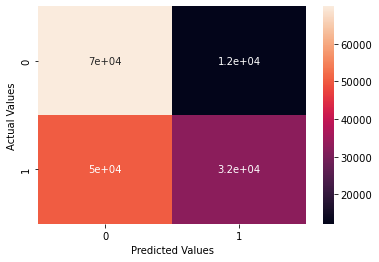

In [38]:
sns.heatmap(cm8,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [39]:
tp,fn,fp,tn=confusion_matrix(over_ytest,pred_y8).reshape(-1)

In [40]:
tp

69940

In [41]:
fn

12203

In [42]:
fp

50219

In [43]:
tn

32312

# Accuracy



In [44]:
(tp+tn)/(tp+tn+fn+fp)

0.6209359097368133

In [45]:
#precision
ppv = tp/(tp+fp)
print(ppv)

0.5820621010494428


In [46]:
#Recall
trp = tp/(tp+fn)
print(trp)

0.8514419974921783


In [47]:
#1-Specificity
fpr = fp/(fp+tn)
print(fpr)

0.6084865080999867


In [48]:
#F1-score
f1_score = (2*ppv*trp)/(ppv+trp)
print(f1_score)

0.6914415082401557


In [49]:
#Specificity
tnr = tn/(tn+fp)
print(tnr)

0.39151349190001333


In [50]:
#CSI
csi = tp/(tp+fn+fp)
print(csi)

0.5283993895528928


In [51]:
#FDR
fdr = fp/(tp+fp)
print(fdr)

0.41793789895055716


# Roc and Auc curve for Multinomial NB


C:\Users\WIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


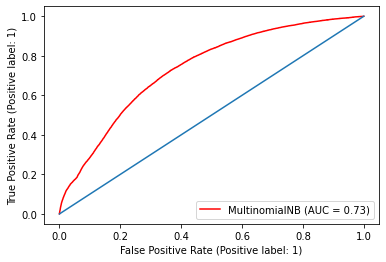

In [52]:
plot_roc_curve(mnb,over_xtest,over_ytest,color='red')
plt.plot([0,1],[0,1])